# Modelling_4_classes

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
jobs_df = pd.read_csv('./jobs_df_4_classes.csv')

# Split jobs_df into train & test sets

In [129]:
cols = [c for c in jobs_df.columns if not c in ['salary_label']]

X = jobs_df[cols]
y = jobs_df['salary_label']

In [130]:
from sklearn.model_selection import train_test_split

# We need to split train & test, preserving the percentage of samples for each class by using stratify = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [20]:
X_train.head(2)

,Unnamed: 0,comb_description
672,672,training coordinator vic contract temp adminis...
102,102,data engineer nsw full time information commun...


In [7]:
X_test.head(2)

,Unnamed: 0,comb_description
590,590,senior leader digital analytics nsw full time ...
445,445,digital insight analyst contract nsw contract ...


In [131]:
# Observing the data frames, each dataframe contains a column "Unnamed: 0" which has original index information.
# Since we do not need this column, we will remove it.

X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test .drop(['Unnamed: 0'], axis=1, inplace=True)

C:\Users\norik\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Baseline accuracy

In [23]:
y_train.value_counts(normalize=True)

4.0    0.260638
3.0    0.255319
1.0    0.242908
2.0    0.241135
Name: salary_label, dtype: float64

The baseline accuracy is 0.26.

## TF-IDF vectorise 'comb_description' column

We will use Term Frequency- Inverse Document Frequency to have more weigh on features that descriminate its document from others. 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [132]:
# Initialise CountVectoriser
tfidf         = TfidfVectorizer(stop_words = 'english', 
                                ngram_range = (1,3),
#                                min_df = 2,          # Ignore terms that appear in less than 2 documents
#                                max_df = 0.95,       # Ignore terms that appear in more than 95% of the documents
                                max_features = 1000)

# Fit & Transform
X_train_tfidf  = pd.DataFrame(tfidf.fit_transform(X_train['comb_description']).todense(),
                             columns = tfidf.get_feature_names(),
                             index = X_train['comb_description'].index)
X_test_tfidf   = pd.DataFrame(tfidf.transform(X_test['comb_description']).todense(),
                             columns = tfidf.get_feature_names(),
                             index = X_test['comb_description'].index)

In [133]:
# Check shapes
print('')
print('Shape of train & test data')
print('')
print('X_train_desc : ', X_train_tfidf.shape)
print('X_test_desc  : ', X_test_tfidf .shape)


Shape of train & test data

X_train_desc :  (564, 1000)
X_test_desc  :  (141, 1000)


In [31]:
# Which words are weighted the most?
word_counts = X_train_tfidf.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

data           68.702277
experience     35.085239
business       33.989760
team           26.055363
role           25.896277
skill          23.734494
work           23.457960
analyst        22.789945
project        21.030079
service        20.762272
information    20.137804
working        19.406221
technology     19.059830
opportunity    18.764835
reporting      18.706841
support        18.055489
management     17.928876
client         17.877355
customer       17.596559
apply          17.488357
dtype: float64

In [32]:
# Which words are weighted the least?
word_counts = X_train_tfidf.sum(axis=0)
word_counts.sort_values(ascending = True).head(20)

edu au                    1.294592
education training        1.299059
edu                       1.336544
closing date              1.363107
people disability         1.364237
evidence                  1.389274
strait                    1.399387
torres strait             1.399387
torres strait islander    1.399387
islander                  1.399387
torres                    1.399387
strait islander           1.399387
reef                      1.417196
institute                 1.420279
aboriginal                1.423615
context                   1.491730
university sydney         1.514006
world class               1.598973
marine                    1.603195
campus                    1.610972
dtype: float64

# METHOD 1: 

Eliminate features by looking at Pearson's correlation between features. If a feature has a correlation with another greater than 0.8, we will remove them.

## Remove correlated features

In [199]:
# Initialise CountVectoriser

tfidf         = TfidfVectorizer(stop_words = 'english', 
                                ngram_range = (1,3),
#                                min_df = 2,          # Ignore terms that appear in less than 2 documents
#                                max_df = 0.95,       # Ignore terms that appear in more than 95% of the documents
                                max_features = 1000)

# Fit & Transform
X_train_tfidf  = pd.DataFrame(tfidf.fit_transform(X_train['comb_description']).todense(),
                             columns = tfidf.get_feature_names(),
                             index = X_train['comb_description'].index)
X_test_tfidf   = pd.DataFrame(tfidf.transform(X_test['comb_description']).todense(),
                             columns = tfidf.get_feature_names(),
                             index = X_test['comb_description'].index)

In [200]:
correlated_features = set()
correlation_matrix = X_train_tfidf.corr()

In [201]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            col_name = correlation_matrix.columns[i]
            correlated_features.add(col_name)

In [202]:
len(correlated_features)

69

In [203]:
correlated_features

{'administration office support',
 'apply click apply',
 'bachelor degree',
 'banking financial service',
 'big data',
 'button',
 'click apply',
 'clinical trial',
 'closing date',
 'com au',
 'confidential discussion',
 'cover letter',
 'cutting edge',
 'discussion',
 'edge',
 'end end',
 'engineer',
 'entry',
 'federal government',
 'gov au',
 'government department',
 'guidewire',
 'hoc',
 'http www',
 'ideal candidate',
 'information communication',
 'information communication technology',
 'internal external stakeholder',
 'letter',
 'machine',
 'machine learning',
 'making',
 'migration',
 'nsw contract temp',
 'office support',
 'paced',
 'people disability',
 'performing',
 'position description',
 'power bi',
 'privacy policy',
 'progression',
 'qld contract temp',
 'regarded',
 'scientist',
 'selection criterion',
 'shortlisted candidate',
 'solving',
 'solving skill',
 'sql server',
 'technology client',
 'temp',
 'temp administration',
 'temp administration office',
 'temp

In [204]:
# Drop correlated features

X_train_tfidf_clean = X_train_tfidf.drop(labels=correlated_features, axis=1)
X_test_tfidf_clean = X_test_tfidf.drop(labels=correlated_features, axis=1)

## Feature selection by chi-squared value

Chi-Squared value will indicate how related each feature is to the target.

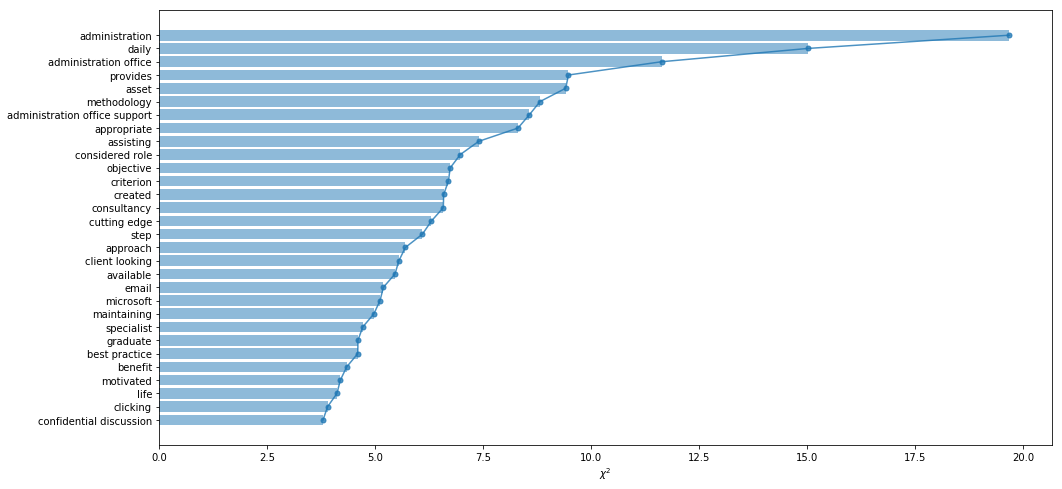

In [205]:
from sklearn.feature_selection import chi2

# We will plot bar chart which shows features that have the 20 highest chi-squared values.
chi2_score = chi2(X_train_tfidf_clean, y_train)[0]
scores     = list(zip(tfidf.get_feature_names(), chi2_score))
chi2       = sorted(scores, key=lambda x:x[1])
top_chi2   = list(zip(*chi2[-30:]))


# Plot
plt.figure(figsize=(16,8))

x = range(len(top_chi2[1]))
labels = top_chi2[0]

plt.barh(x,top_chi2[1], align='center', alpha=0.5)
plt.plot(top_chi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

Here, we'll check the f_score. The f-score give how informative the feature is.

In [161]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialise skb
skb = SelectKBest(chi2, k=5)

# Find kbest by examining the F-score
# F-scores are the test statistic for the F-test, and they represent the ratio between ..
# .. the explained and the unexplained variance
skb.fit(X_train_tfidf_clean, y_train)

kbest = pd.DataFrame({'feature_skb': X_train_tfidf_clean.columns.values.tolist(), 
                      'f_score': skb.scores_.tolist()}).sort_values('f_score', ascending = False)

kbest.reset_index(drop = True, inplace = True)
kbest.head(20)

,feature_skb,f_score
0,administration,19.673511
1,data entry,15.005565
2,administration office,11.627848
3,research,9.472717
4,assistant,9.407985
5,office,8.815246
6,administrative,8.566781
7,architecture,8.303760
8,attention,7.395949
9,contract temp administration,6.967985


## Create a classifier function

In [ ]:
from sklearn.linear_model    import LogisticRegression
from sklearn.naive_bayes     import MultinomialNB
from sklearn.ensemble        import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble        import BaggingClassifier, AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

### We'll also examine the effectiveness of classifier

- Precision = True Positives / (True Positives + False Positives)
  A precision score of 1 indicates that the classifier never mistakenly added observations from another class. A precision score of 0 would mean that the classifier misclassified every instance of the current class.

- Recall = True Positives / (True Positives + False Negatives)
  A recall score of 1 indicates that the classifier correctly predicted (found) all observations of the current class (by implication, no false negatives, or misclassifications of the current class). A recall score of 0 alternatively means that the classifier missed all observations of the current class.

- F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
  The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once.

- Support is simply the number of observations of the labelled class.

In [ ]:
def classifier(model_name, X_train, X_test):
    
    # Initialise classifier
    
    if model_name == GridSearchCV:
        rf     = RandomForestClassifier(n_estimators=10)
        params = {'max_depth': [10]}
        clf    = GridSearchCV(rf, params, n_jobs = -1, cv = 10)  
        clf.fit(X_train, y_train);
        cv_scores = cross_val_score(clf, X_train, y_train, cv = 10)
        
    
    else:
        clf = model_name()
        clf.fit(X_train, y_train);
        cv_scores = cross_val_score(clf, X_train, y_train, cv = 10)


    print('')
    print('%s' % (model_name))
    print('')
    print('Score for training data: ', clf.score(X_train, y_train))
    print('Score for test data    : ', clf.score(X_test, y_test))
    print('--------------------------------------------------------------')
    #print(cv_scores)
    print('Cross_val_score : ', cv_scores.mean())
    print('--------------------------------------------------------------')
    print('Confusion matrix')
    print('')
    print(confusion_matrix(y_test, clf.predict(X_test)))
    print('--------------------------------------------------------------')
    print('Classification report')
    print('')
    print(classification_report(y_test, clf.predict(X_test)))

In [181]:
def coefficients(model_name, X_train):
   
    # Initialise classifier
    
    if model_name == GridSearchCV:
        rf     = RandomForestClassifier(n_estimators=10)
        params = {'max_depth': [10]}
        clf    = GridSearchCV(rf, params, n_jobs = -1, cv = 10)  
        clf.fit(X_train, y_train);
    
    else:
        clf = model_name()
        clf.fit(X_train, y_train);

    
    if model_name == RandomForestClassifier:
        features_df = pd.DataFrame({'feature'  : X_train.columns.values,
                                'coeff'    : clf.feature_importances_()}).sort_values('coeff_abs', ascending = False)
                                #'coeff_abs': abs(clf.feature_importances_[0, :])}).sort_values('coeff_abs', ascending = False)
        
    else:
        features_df = pd.DataFrame({'feature'  : X_train.columns.values,
                                'coeff'    : clf.coef_[0, :],
                                'coeff_abs': abs(clf.coef_[0, :])}).sort_values('coeff_abs', ascending = False)
    
    return features_df.head(20)
    

### Method 1 - 1. Logistic regression

In [163]:
classifier(LogisticRegression, X_train_tfidf_clean, X_test_tfidf_clean)


<class 'sklearn.linear_model.logistic.LogisticRegression'>

Score for training data:  0.8563829787234043
Score for test data    :  0.5673758865248227
--------------------------------------------------------------
Cross_val_score :  0.5481894391150289
--------------------------------------------------------------
Confusion matrix

[[27  3  2  2]
 [ 9 12  8  5]
 [ 1 10 14 11]
 [ 1  1  8 27]]
--------------------------------------------------------------
Classification report

              precision    recall  f1-score   support

         1.0       0.71      0.79      0.75        34
         2.0       0.46      0.35      0.40        34
         3.0       0.44      0.39      0.41        36
         4.0       0.60      0.73      0.66        37

   micro avg       0.57      0.57      0.57       141
   macro avg       0.55      0.57      0.56       141
weighted avg       0.55      0.57      0.56       141



In [176]:
coefficients(LogisticRegression, X_train_tfidf_clean)

,feature,coeff,coeff_abs
21,administration,2.004822,2.004822
226,data,-1.670800,1.670800
237,data entry,1.477024,1.477024
70,attention,1.342482,1.342482
580,office,1.329936,1.329936
483,junior,1.279717,1.279717
46,analytics,-1.152080,1.152080
22,administration office,1.084373,1.084373
672,project,-1.083675,1.083675
95,bi,-1.071105,1.071105


The score of applying the model on test data is 0.57 which is well above the base line of 0.24. This model is fairly accurate in identifying the lowest and highest salary bracket from the features with f-1 score of greater than 0.65. From the coefficients table, it is clear the words such as 'administration', 'data entry', 'junior' are strongly associated with the lower salary class while 'data', 'analytics' and 'BI' are related to higher salary class. 

### Method 1 - 2. Random Forest
Random forest is an ensembe model using bagging as ensemble method and decision tree as the individual model

In [164]:
classifier(RandomForestClassifier, X_train_tfidf_clean, X_test_tfidf_clean)


<class 'sklearn.ensemble.forest.RandomForestClassifier'>

Score for training data:  0.9875886524822695
Score for test data    :  0.5106382978723404
--------------------------------------------------------------
Cross_val_score :  0.5139780725760763
--------------------------------------------------------------
Confusion matrix

[[26  4  1  3]
 [11 10  8  5]
 [ 3  8 14 11]
 [ 8  0  7 22]]
--------------------------------------------------------------
Classification report

              precision    recall  f1-score   support

         1.0       0.54      0.76      0.63        34
         2.0       0.45      0.29      0.36        34
         3.0       0.47      0.39      0.42        36
         4.0       0.54      0.59      0.56        37

   micro avg       0.51      0.51      0.51       141
   macro avg       0.50      0.51      0.49       141
weighted avg       0.50      0.51      0.50       141



In [185]:
rf     = RandomForestClassifier(n_estimators=10)
rf.fit(X_train_tfidf_clean, y_train);

# Print the name and gini importance of each feature
for feature in zip(X_train_tfidf_clean.columns.values.tolist(), rf.feature_importances_):
    print(feature)

('ability', 0.0018402502876481643)
('ability work', 0.002032176543108223)
('able', 0.0)
('aboriginal', 0.0007053328493202496)
('access', 0.0003162294682130512)
('accordance', 0.0)
('account', 0.0)
('accountability', 0.0009538476678786682)
('accounting', 0.0016910889147688708)
('accuracy', 0.0)
('accurate', 0.0016881463357397981)
('achieve', 0.0006871098771327782)
('act', 0.0)
('action', 0.0004284206551820064)
('active', 0.0)
('actively', 0.0011912737776975332)
('activity', 0.0003162294682130512)
('ad', 0.0018720619168233732)
('ad hoc', 0.00134512685778073)
('additional', 0.0)
('address', 0.0)
('administration', 0.0016132274027132667)
('administration office', 0.012374722005527135)
('administrative', 0.0038466341537529273)
('administrator', 0.0)
('adobe', 0.0)
('advanced', 0.0008246012783924306)
('advanced excel', 0.0)
('advantage', 0.001194078992737655)
('advantageous', 0.0)
('advice', 0.0)
('agency', 0.00011914721018074885)
('agile', 0.0008181057214183159)
('ai', 0.0003557581517396826

In [191]:
from sklearn.feature_selection import SelectFromModel

# Identify features that have an importance of more than 0.15
sfm = SelectFromModel(rf, threshold=0.005)

# Train the selector
sfm.fit(X_train_tfidf_clean, y_train)

# Names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X_train_tfidf_clean.columns.values.tolist()[feature_list_index])

ability
administration
administration office
analysis
architecture
attention
client
communication
communication technology
contract
contract temp
customer
customer service
data
ensure
established
experience
hour
information
internal
management
nsw
requirement
solution
stakeholder
support
task
technology
time
time information
working


### Method 1 - 3. Random Forest with Grid Search

In [192]:
classifier(GridSearchCV, X_train_tfidf_clean, X_test_tfidf_clean)

C:\Users\norik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\norik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\norik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\norik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation


<class 'sklearn.model_selection._search.GridSearchCV'>

Score for training data:  0.925531914893617
Score for test data    :  0.574468085106383
--------------------------------------------------------------
Cross_val_score :  0.5370469996831158
--------------------------------------------------------------
Confusion matrix

[[26  3  4  1]
 [10 11  4  9]
 [ 4  3 18 11]
 [ 1  5  5 26]]
--------------------------------------------------------------
Classification report

              precision    recall  f1-score   support

         1.0       0.63      0.76      0.69        34
         2.0       0.50      0.32      0.39        34
         3.0       0.58      0.50      0.54        36
         4.0       0.55      0.70      0.62        37

   micro avg       0.57      0.57      0.57       141
   macro avg       0.57      0.57      0.56       141
weighted avg       0.57      0.57      0.56       141



C:\Users\norik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Comparing the random forest and with grid search, the latter improved the model score by 0.06. The accuracy to correctly class 1st, 2nd an 4th brackets improved relatively significantly while it remained the same for the 2nd bracket. It appears that it is difficult to differentiate 2nd from 1st bracket.

### Method 1 - 4. AdaBoost
AdaBoost is a boosting ensemble

In [193]:
classifier(AdaBoostClassifier, X_train_tfidf_clean, X_test_tfidf_clean)


<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>

Score for training data:  0.6453900709219859
Score for test data    :  0.49645390070921985
--------------------------------------------------------------
Cross_val_score :  0.45815352557639305
--------------------------------------------------------------
Confusion matrix

[[18  4  9  3]
 [ 3 17 10  4]
 [ 1 13 17  5]
 [ 0  7 12 18]]
--------------------------------------------------------------
Classification report

              precision    recall  f1-score   support

         1.0       0.82      0.53      0.64        34
         2.0       0.41      0.50      0.45        34
         3.0       0.35      0.47      0.40        36
         4.0       0.60      0.49      0.54        37

   micro avg       0.50      0.50      0.50       141
   macro avg       0.55      0.50      0.51       141
weighted avg       0.55      0.50      0.51       141



AdaBoost resulted in the least accurate model. We should further examine if this is the case by feeding larger amount of data. 

# Method 2:
Another way to deal with multicollinearity is to use Singular Value Decomposition. This will reduce dimensionality.

## Apply Singular Value Decomposition (SVD)

We will use Latent Sematic Analysis (LSA aka Truncated SVD). The LSA is preferred over Principal Component Analysis (PCA) as it can operate on a sparse matric while PCA cannot. For PCA, the covariance matrix must be computed and this requrires operating on the entire matrix. 

The LSA will break down the spare matrix to three matrices:

1. Word matrix for topics (terms x topics) : Word matrix for topica
2. Topic importance (topics x topics diagonal matrix) : Topic strength/ importance
3. Topic distribution across document (topics x doc) : Document matrix for topic

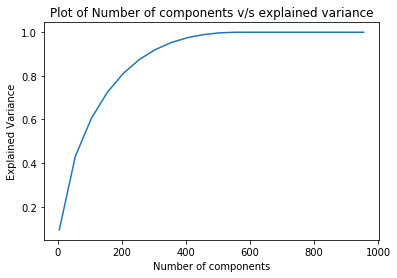

In [150]:
# Find the optimal number of components for Truncated SVD
from sklearn.decomposition import TruncatedSVD


# Create a list containing different values of components
n_comp    = [n for n in range(5, 1000, 50)]

# explained variance ratio for each component of Truncated SVD
explained_var_ratio = []

for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(X_train_tfidf)
    explained_var_ratio.append(svd.explained_variance_ratio_.sum())


# Plot number of components vs explained variance
plt.plot(n_comp, explained_var_ratio)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

From the graph above, the explained variance seems to be stagnant from about 400 components. 

In [151]:
# Initialise LSA
LSA = TruncatedSVD(n_components=400)
LSA.fit(X_train_tfidf)

# Transform both train & test data set
LSA_X_train = LSA.transform(X_train_tfidf)
LSA_X_test  = LSA.transform(X_test_tfidf)

In [152]:
# Check explained variance to ensure that reduced features still contain the explained variance from the original features.

explained_variance = LSA.explained_variance_ratio_.sum()
print("Sum of explained variance ratio: %d%%" % (int(explained_variance * 100)))

Sum of explained variance ratio: 97%


In [153]:
# Check shapes
print('')
print('Shape of train & test data')
print('')
print('LSA_X_train : ', LSA_X_train.shape)
print('LSA_X_test  : ', LSA_X_test .shape)
print('y_train_df  : ', y_train.shape)
print('y_test_df   : ', y_test .shape)


Shape of train & test data

LSA_X_train :  (564, 400)
LSA_X_test  :  (141, 400)
y_train_df  :  (564,)
y_test_df   :  (141,)


In [154]:
# Transformed components
LSA.components_

array([[ 0.07581549,  0.02379958,  0.02968339, ...,  0.02648284,
         0.0631774 ,  0.03621489],
       [-0.05885369, -0.0150711 , -0.02827174, ..., -0.02224218,
        -0.00791168,  0.00701625],
       [-0.0140731 ,  0.01564617,  0.01930769, ..., -0.00923037,
         0.00460382,  0.00817087],
       ...,
       [ 0.06122829,  0.02277948, -0.00761742, ..., -0.02424334,
        -0.02267614,  0.04190665],
       [-0.04452629, -0.01517464,  0.01535928, ...,  0.00057608,
         0.0215282 , -0.04688939],
       [-0.01205319, -0.02165463, -0.00454122, ..., -0.01548007,
         0.0299891 , -0.02065255]])

### Method 2 - 1. Logistic regression

In [195]:
classifier(LogisticRegression, LSA_X_train, LSA_X_test)


<class 'sklearn.linear_model.logistic.LogisticRegression'>

Score for training data:  0.849290780141844
Score for test data    :  0.5957446808510638
--------------------------------------------------------------
Cross_val_score :  0.5660637465310786
--------------------------------------------------------------
Confusion matrix

[[27  3  2  2]
 [ 7 14  9  4]
 [ 1 10 15 10]
 [ 1  1  7 28]]
--------------------------------------------------------------
Classification report

              precision    recall  f1-score   support

         1.0       0.75      0.79      0.77        34
         2.0       0.50      0.41      0.45        34
         3.0       0.45      0.42      0.43        36
         4.0       0.64      0.76      0.69        37

   micro avg       0.60      0.60      0.60       141
   macro avg       0.59      0.59      0.59       141
weighted avg       0.58      0.60      0.59       141



### Method 2 - 2. Random Forest 
Random forest is an ensembe model using bagging as ensemble method and decision tree as the individual model

In [196]:
classifier(RandomForestClassifier, LSA_X_train, LSA_X_test)


<class 'sklearn.ensemble.forest.RandomForestClassifier'>

Score for training data:  0.9929078014184397
Score for test data    :  0.44680851063829785
--------------------------------------------------------------
Cross_val_score :  0.4098309711059257
--------------------------------------------------------------
Confusion matrix

[[21  7  3  3]
 [13 13  4  4]
 [ 8  9  8 11]
 [ 4  4  8 21]]
--------------------------------------------------------------
Classification report

              precision    recall  f1-score   support

         1.0       0.46      0.62      0.52        34
         2.0       0.39      0.38      0.39        34
         3.0       0.35      0.22      0.27        36
         4.0       0.54      0.57      0.55        37

   micro avg       0.45      0.45      0.45       141
   macro avg       0.43      0.45      0.43       141
weighted avg       0.44      0.45      0.43       141



### Method 2 - 3. Random Forest with Grid Search

In [197]:
classifier(GridSearchCV, LSA_X_train, LSA_X_test)

C:\Users\norik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\norik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\norik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\norik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Deprecation


<class 'sklearn.model_selection._search.GridSearchCV'>

Score for training data:  0.9822695035460993
Score for test data    :  0.45390070921985815
--------------------------------------------------------------
Cross_val_score :  0.36317818012464115
--------------------------------------------------------------
Confusion matrix

[[23  5  4  2]
 [ 7 10 13  4]
 [ 2 11 10 13]
 [ 3  3 10 21]]
--------------------------------------------------------------
Classification report

              precision    recall  f1-score   support

         1.0       0.66      0.68      0.67        34
         2.0       0.34      0.29      0.32        34
         3.0       0.27      0.28      0.27        36
         4.0       0.53      0.57      0.55        37

   micro avg       0.45      0.45      0.45       141
   macro avg       0.45      0.45      0.45       141
weighted avg       0.45      0.45      0.45       141



C:\Users\norik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Method 2 - 4. AdaBoost
AdaBoost is a boosting ensemble

In [198]:
classifier(AdaBoostClassifier, LSA_X_train, LSA_X_test)


<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>

Score for training data:  0.6099290780141844
Score for test data    :  0.41843971631205673
--------------------------------------------------------------
Cross_val_score :  0.40941169974745295
--------------------------------------------------------------
Confusion matrix

[[18  7  7  2]
 [ 6 12 15  1]
 [ 2  9 17  8]
 [ 1  6 18 12]]
--------------------------------------------------------------
Classification report

              precision    recall  f1-score   support

         1.0       0.67      0.53      0.59        34
         2.0       0.35      0.35      0.35        34
         3.0       0.30      0.47      0.37        36
         4.0       0.52      0.32      0.40        37

   micro avg       0.42      0.42      0.42       141
   macro avg       0.46      0.42      0.43       141
weighted avg       0.46      0.42      0.43       141



Overall, the only model which showed improvement from moethod 1 to 2 is the LogisticRegression. AdaBoost performed poorly on both methods. This may be because of the model being sensitive to noise & outliers. As it gives more weight on previously misclassified data, the noise may have larger significance and hence, affecting the subsequent model. Random forest appears to be over-fitted with 0.98-0.99 score on training data. Fruther study is required for n_estimators and other inputs. 